In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [44]:
print(df.duplicated().sum())

0


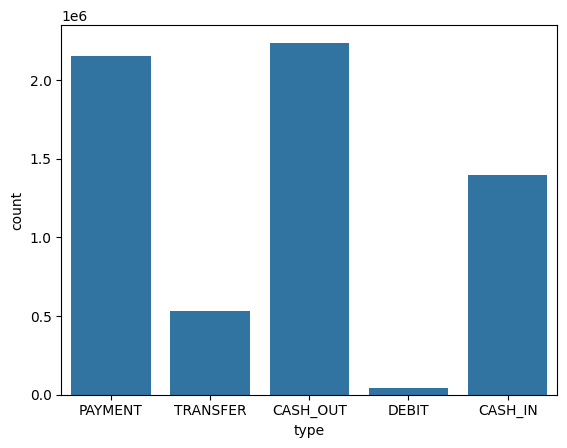

In [45]:
sns.countplot(x='type', data=df)
plt.show()

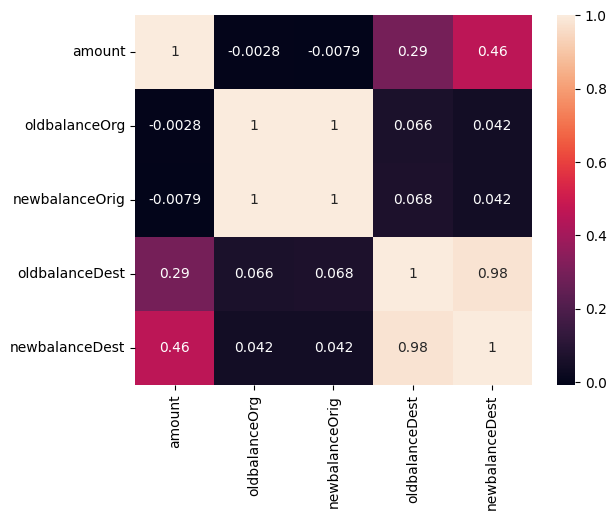

In [46]:
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [47]:
categorical = ['type']

df_encoded = pd.get_dummies(df, columns=categorical)

In [48]:
bool_cols = ["type_CASH_IN", "type_CASH_OUT", "type_DEBIT", "type_PAYMENT", "type_TRANSFER"]
df_encoded[bool_cols] = df_encoded[bool_cols].replace({True: 1, False: 0})

C:\Users\Szymon\AppData\Local\Temp\ipykernel_10000\1337212630.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[bool_cols] = df_encoded[bool_cols].replace({True: 1, False: 0})


In [49]:
df_encoded.drop(columns=['nameOrig', 'nameDest', 'step', 'isFlaggedFraud'], inplace=True)

In [50]:
df_encoded.to_csv('../data/prepared_data.csv', index=False)